In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataMerger

%matplotlib inline

In [4]:
dm = DataMerger(start_date="2020-1-22", end_date="2020-4-25")

In [23]:
# name, epidemicforecasting.org code, OxCGRT code
# + lithuania
region_info = [
    ("Andorra", "AD", "AND"),
    ("Austria", "AT",  "AUT"),
    ("Albania","AL","ALB"),
    ("Bosnia and Herzegovina", "BA", "BIH"),
    ("Belgium", "BE", "BEL"),
    ("Bulgaria",  "BG", "BGR"),
    ("Switzerland", "CH", "CHE"),
    ("Czech Republic", "CZ", "CZE"),
    ("Germany", "DE", "DEU"),
    ("Denmark", "DK", "DNK"),
    ("Estonia","EE", "EST"),
    ("Spain", "ES", "ESP"),
    ("Finland", "FI", "FIN"),
    ("France", "FR", "FRA"),
    ("United Kingdom", "GB", "GBR"), 
    ("Georgia","GE","GEO"),
    ("Greece", "GR", "GRC"),
    ("Croatia", "HR", "HRV"),
    ("Hungary", "HU", "HUN"),
    ("Ireland", "IE", "IRL"),
    ("Israel", "IL", "ISR"),
    ("Iceland", "IS", "ISL"),
    ("Italy", "IT", "ITA"),
    ("Lithuania","LT","LTU"),
    ("Latvia","LV","LVA"),
    ("Malta","MT","MLT"),
    ("Morocco", "MA", "MAR"),
    ("Mexico","MX", "MEX"),
    ("Malaysia", "MY", "MYS"),
    ("Netherlands", "NL", "NLD"),
    ("Norway","NO","NOR"),
    ("New Zealand","NZ","NZL"),
    ("Poland","PL", "POL"),
    ("Portugal","PT","PRT"),
    ("Romania","RO", "ROU"),
    ("Serbia", "RS", "SRB"),
    ("Sweden", "SE", "SWE"),
    ("Singapore", "SG", "SGP"),
    ("Slovenia", "SI", "SVN"),
    ("Slovakia", "SK", "SVK"),
    ("South Africa", "ZA",  "ZAF"),
]

region_info.sort(key = lambda x: x[0])
region_names = list([x for x, _, _ in region_info])
regions_epi = list([x for _, x, _ in region_info])
regions_oxcgrt = list([x for _, _, x in region_info])

# OxCGRT
oxcgrt_cm_cols = ["H2_Testing policy"]

oxcgrt_filter = [
    ("Symptomatic Testing", [(0, [2, 3])]),
]

epifor_features = {
 "Mask wearing over 60%": "Mask Wearing",
 "Business suspended - some": "Some Businesses Suspended",
 "Business suspended - many": "Most Businesses Suspended",
 "Healthcare infection control - strong": "Healthcare Infection Control",
 "General curfew": "Stay Home Order",
 "Gatherings limited to 1000": "Gatherings <1000",    
 "Gatherings limited to 100": "Gatherings <100", 
 "Gatherings limited to 10": "Gatherings <10",
 "Schools and universities closed": "School Closure"
}

epifor_check_cols= {"Events above 10 people banned authoritative":"Gatherings <10",
                     "Events above 100 people banned authoritative":"Gatherings <100",
                     "Events above 1000 people banned authoritative":"Gatherings <1000",
                     "Stay at home authoritative":"Stay Home Order",
                     "Risky businesses closed authoritative":"Some Businesses Suspended",
                     "All non-essential businesses closed authoritative":"Most Businesses Suspended",
                     "Infection control in healthcare system - weak authoritative":"Healthcare Infection Control"}

final_features = [
 "Healthcare Infection Control",
 "Mask Wearing",
 "Symptomatic Testing",
 "Gatherings <1000",
 "Gatherings <100",
 "Gatherings <10",
 "Some Businesses Suspended",
 "Most Businesses Suspended",
 "School Closure",
 "Stay Home Order"
]

INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Updating from epidemicforecasting.org double-check data
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor: updating Gatherings <10


Loading from epidemicforecasting.org


INFO:epimodel.pymc3_models.cm_effect.datapreprocessor: updating Gatherings <100
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor: updating Gatherings <1000
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor: updating Stay Home Order
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor: updating Some Businesses Suspended
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor: updating Most Businesses Suspended
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor: updating Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Mask Override
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures: EpidemicForecasting.org           min   ... mean  ... max   ... unique
 1 Mask Wearing                               0.000 ... 0.099 ... 1.000 ... [0. 1.]
 2 Some Businesses Suspended                  0.000 ... 0.410 ... 1.000 ... [0. 1.]
 3 Most Businesses Suspended                  0.000 ... 0.303 ... 1.000 ... [0. 1.]
 4 Healthcare Infection

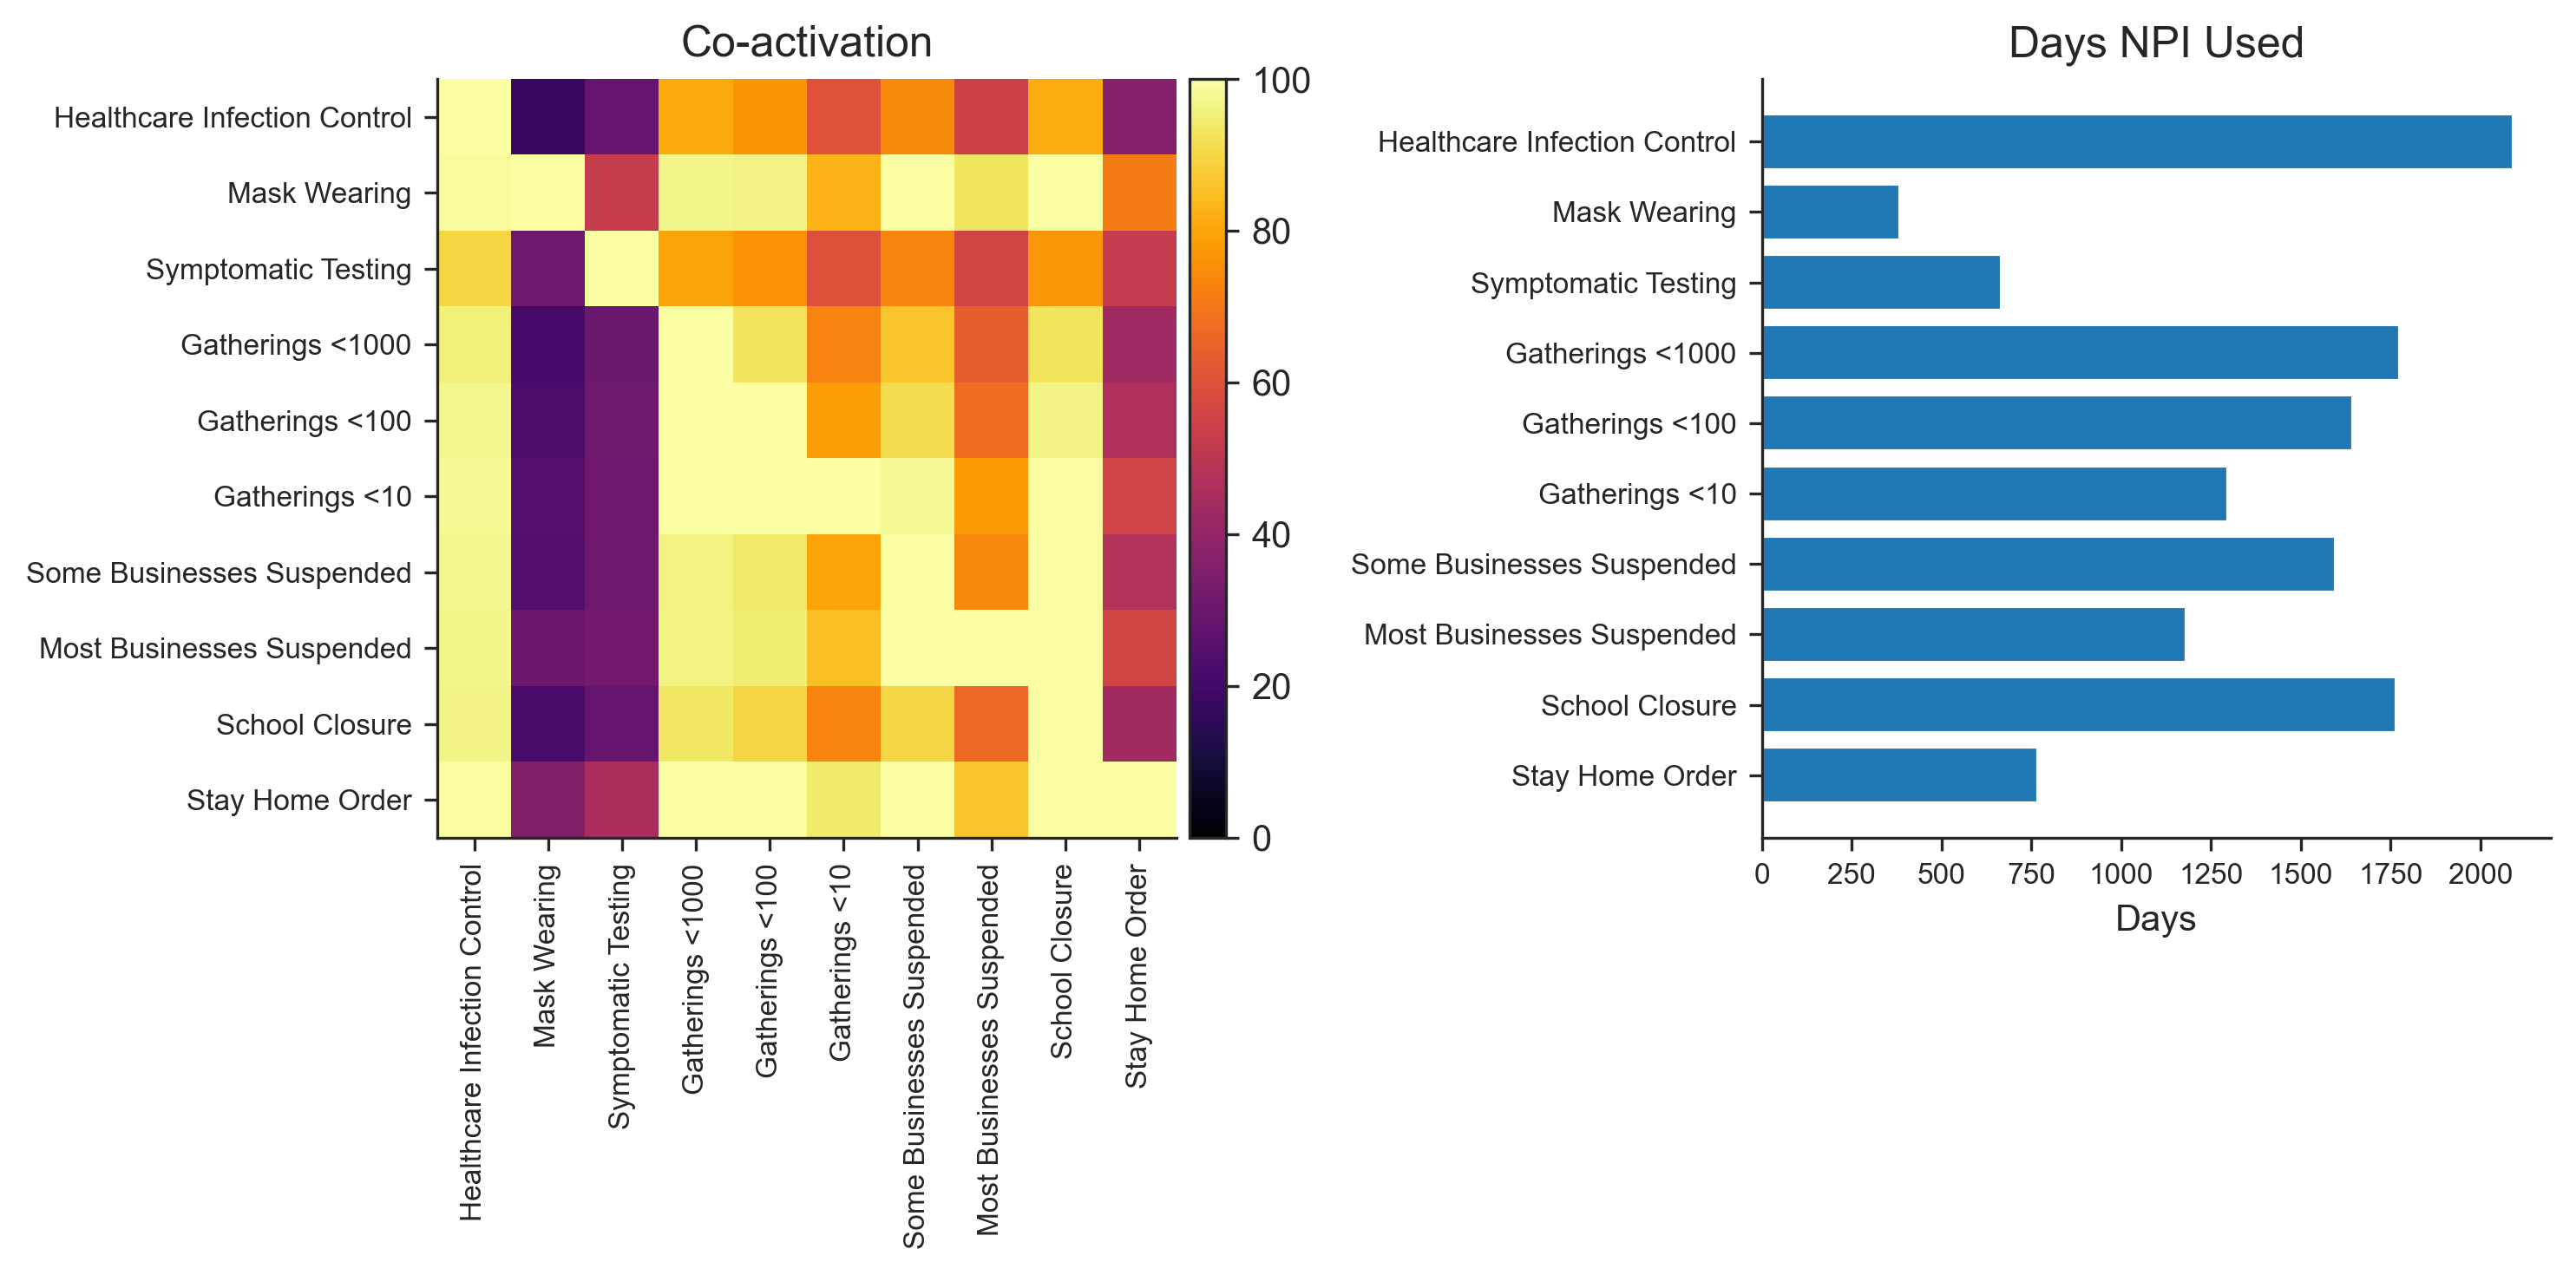

In [25]:
dm.merge_data("../../data", region_info, oxcgrt_filter,  oxcgrt_cm_cols,
            epifor_features,
            final_features,
            epifor_check_cols)